In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
salesDataDF = pd.read_csv('../../01. EDA/ch_07 EDA/Project/Big Mart/bigmartsales.csv')
salesDataDF.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8,OUT049,1999,Medium,Tier 2,Supermarket Type1,3735.1380,11.5
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.3,OUT018,2009,Medium,Tier 2,Supermarket Type2,443.4228,14.3
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6,OUT049,1999,Medium,Tier 2,Supermarket Type1,2097.2700,14.5
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.1,OUT010,1998,NaN,NaN,Grocery Store,732.3800,13.6
4,NCD19,8.93,Low Fat,0.000000,Household,53.9,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,14.1


In [3]:
salesDataDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7774 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       6473 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Profit                     8523 non-null   float64
dtypes: float64(5), int64(1), object(7)
memory usage:

In [4]:
salesDataDF.isnull().sum()

Item_Identifier                 0
Item_Weight                   749
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type         2050
Outlet_Type                     0
Item_Outlet_Sales               0
Profit                          0
dtype: int64

In [5]:
dropCols = ['Item_Identifier', 'Item_Weight', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Identifier' ]
salesDataDF.drop(dropCols, axis=1, inplace=True)
salesDataDF.head()

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Type,Item_Outlet_Sales,Profit
0,Low Fat,0.016047,Dairy,249.8,1999,Supermarket Type1,3735.1380,11.5
1,Regular,0.019278,Soft Drinks,48.3,2009,Supermarket Type2,443.4228,14.3
2,Low Fat,0.016760,Meat,141.6,1999,Supermarket Type1,2097.2700,14.5
3,Regular,0.000000,Fruits and Vegetables,182.1,1998,Grocery Store,732.3800,13.6
4,Low Fat,0.000000,Household,53.9,1987,Supermarket Type1,994.7052,14.1


In [6]:
salesDataDF.nunique()

Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     2098
Outlet_Establishment_Year       9
Outlet_Type                     4
Item_Outlet_Sales            3493
Profit                        140
dtype: int64

In [7]:
salesDataDF.duplicated().sum()

0

(array([5089.,    0., 2889.,    0.,    0.,  112.,    0.,  316.,    0.,
         117.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

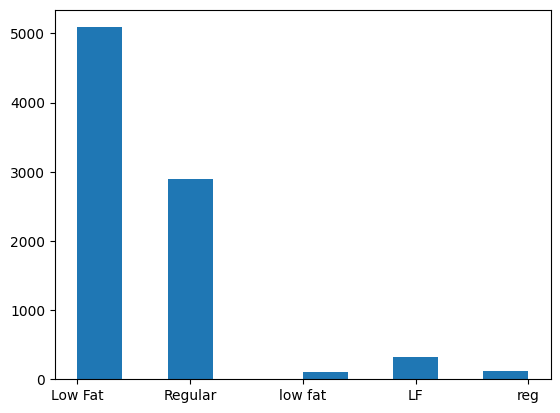

In [8]:
plt.hist(salesDataDF['Item_Fat_Content'])

In [9]:
salesDataDF['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [63]:
salesDataDF.loc[salesDataDF['Item_Fat_Content'] == 'low fat', 'Item_Fat_Content'] = \
    salesDataDF.loc[salesDataDF['Item_Fat_Content'] == 'low fat', 'Item_Fat_Content']\
        .transform(lambda x: x.title())

In [11]:
salesDataDF.loc[salesDataDF['Item_Fat_Content'] == 'reg', 'Item_Fat_Content'] = 'Regular'
salesDataDF.loc[salesDataDF['Item_Fat_Content'] == 'LF', 'Item_Fat_Content'] = 'Low Fat'
salesDataDF.loc[salesDataDF['Item_Fat_Content'] == 'low fat', 'Item_Fat_Content'] = 'Low Fat'

In [12]:
salesDataDF['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

(array([5517.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        3006.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

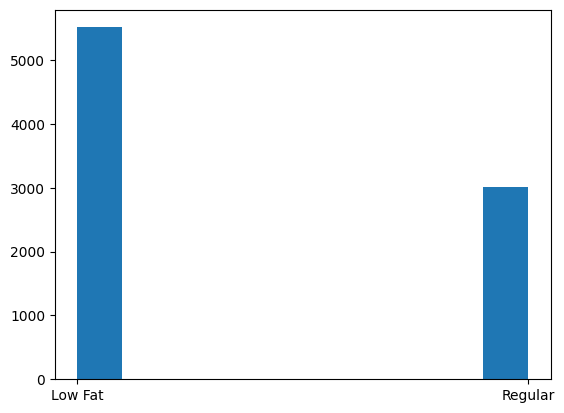

In [13]:
plt.hist(salesDataDF['Item_Fat_Content'])

In [44]:
df_cnt = salesDataDF.groupby('Item_Fat_Content')['Item_Fat_Content'].agg(pd.Series.count)
l = df_cnt.index
idx = []
for i in range(len(l)):
    idx.append(l[i]+" "+ str(round(df_cnt.iloc[i]/salesDataDF.shape[0] * 100, 2))+" % (" +str(df_cnt.iloc[i])+ ")")

df_cnt = pd.Series(list(df_cnt), idx)

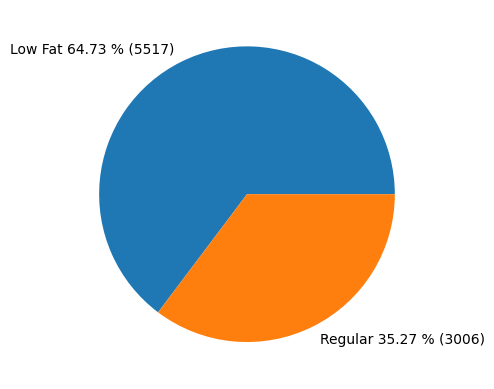

In [45]:
plt.pie(df_cnt,labels=df_cnt.index)
plt.show()

In [16]:
salesDataDF.nunique()

Item_Fat_Content                2
Item_Visibility              7880
Item_Type                      16
Item_MRP                     2098
Outlet_Establishment_Year       9
Outlet_Type                     4
Item_Outlet_Sales            3493
Profit                        140
dtype: int64

Text(0, 0.5, 'Profit')

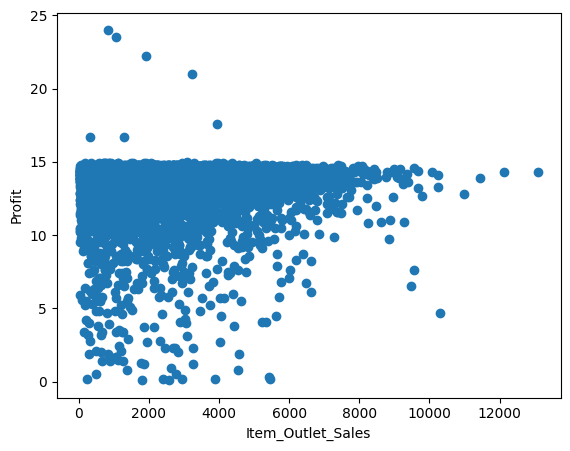

In [17]:
plt.figure(figsize=(6.5,5))
plt.scatter(salesDataDF.Item_Outlet_Sales, salesDataDF.Profit )
plt.xlabel('Item_Outlet_Sales')
plt.ylabel('Profit')

In [19]:
salesDataDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Fat_Content           8523 non-null   object 
 1   Item_Visibility            8523 non-null   float64
 2   Item_Type                  8523 non-null   object 
 3   Item_MRP                   8523 non-null   float64
 4   Outlet_Establishment_Year  8523 non-null   int64  
 5   Outlet_Type                8523 non-null   object 
 6   Item_Outlet_Sales          8523 non-null   float64
 7   Profit                     8523 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 532.8+ KB


In [21]:
tar_cols=salesDataDF.select_dtypes(exclude=object).columns.tolist()
tar_cols

['Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales',
 'Profit']

In [22]:
cat_cols=salesDataDF.select_dtypes(include=object).columns.tolist()
cat_cols

['Item_Fat_Content', 'Item_Type', 'Outlet_Type']

In [23]:
cor_mat= salesDataDF[tar_cols].corr()
cor_mat

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Profit
Item_Visibility,1.000000,-0.001597,-0.074834,-0.128625,0.014269
Item_MRP,-0.001597,1.000000,0.005046,0.567555,0.004109
Outlet_Establishment_Year,-0.074834,0.005046,1.000000,-0.049135,-0.019674
Item_Outlet_Sales,-0.128625,0.567555,-0.049135,1.000000,0.000951
Profit,0.014269,0.004109,-0.019674,0.000951,1.000000


<Axes: >

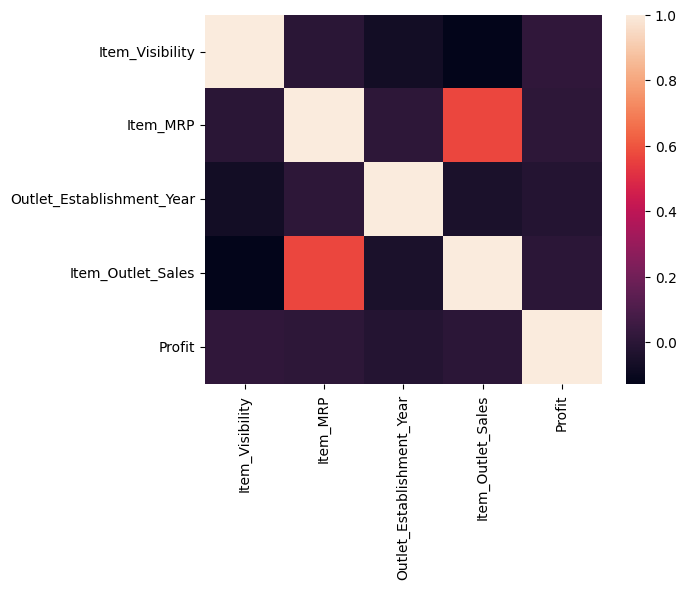

In [24]:
sns.heatmap(data=cor_mat)

In [25]:
#preprocess.
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

In [27]:
le=LabelEncoder()
for col in cat_cols:
    salesDataDF[col]=le.fit_transform(salesDataDF[col])
salesDataDF

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Type,Item_Outlet_Sales,Profit
0,0,0.016047,4,249.8,1999,1,3735.1380,11.5
1,1,0.019278,14,48.3,2009,2,443.4228,14.3
2,0,0.016760,10,141.6,1999,1,2097.2700,14.5
3,1,0.000000,6,182.1,1998,0,732.3800,13.6
4,0,0.000000,9,53.9,1987,1,994.7052,14.1
...,...,...,...,...,...,...,...,...
8518,0,0.056783,13,214.5,1987,1,2778.3834,14.1
8519,1,0.046982,0,108.2,2002,1,549.2850,14.2
8520,0,0.035186,8,85.1,2004,1,1193.1136,9.5
8521,1,0.145221,13,103.1,2009,2,1845.5976,14.2


<Axes: >

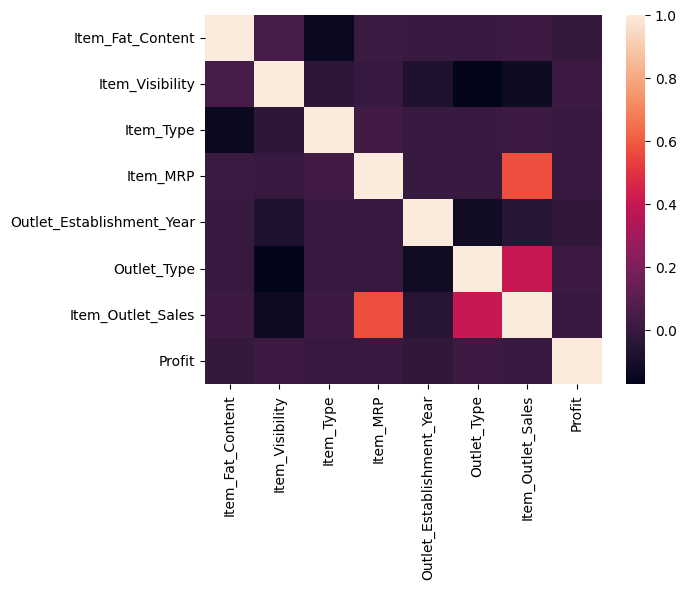

In [28]:
sns.heatmap(data=salesDataDF.corr())

In [ ]:
X = salesDataDF.drop('Profit', axis=1)
y = salesDataDF['Profit']